In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
meter=pd.read_csv('https://dev-smartutils.techolution.com/smartmeter/data/downloadMainsMeterHistory?fromTime=2020-03-01T18:30:00.209Z&toTime=2020-05-26T12:34:16.191Z&groupByTime=1h')

In [3]:
meter=meter.dropna()

In [4]:
meter.head()

,Date,Time,Key,Phase1,Phase2,Phase3,Unit
216,2020-03-03,12:00:00,Mains Current,25.86,26.98,16.94,A
217,2020-03-03,12:00:00,Mains Power Factor,0.99,0.99,0.97,units
218,2020-03-03,12:00:00,Mains Power,6.21,6.47,4.01,kW
219,2020-03-03,12:00:00,Mains Total Energy,2472.38,2472.38,2472.38,kWh
220,2020-03-03,12:00:00,Mains Voltage,242.22,241.60,242.94,V


In [5]:
meter.head(20)

,Date,Time,Key,Phase1,Phase2,Phase3,Unit
216,2020-03-03,12:00:00,Mains Current,25.86,26.98,16.94,A
217,2020-03-03,12:00:00,Mains Power Factor,0.99,0.99,0.97,units
218,2020-03-03,12:00:00,Mains Power,6.21,6.47,4.01,kW
219,2020-03-03,12:00:00,Mains Total Energy,2472.38,2472.38,2472.38,kWh
220,2020-03-03,12:00:00,Mains Voltage,242.22,241.60,242.94,V
222,2020-03-03,13:00:00,Mains Current,27.57,21.51,14.77,A
223,2020-03-03,13:00:00,Mains Power Factor,0.99,0.98,0.96,units
224,2020-03-03,13:00:00,Mains Power,6.68,5.14,3.48,kW
225,2020-03-03,13:00:00,Mains Total Energy,2485.56,2485.56,2485.56,kWh
226,2020-03-03,13:00:00,Mains Voltage,244.04,244.07,245.43,V


In [6]:
meter=meter.loc[meter['Key']=='Mains Total Energy']

In [7]:
meter.head(14)

,Date,Time,Key,Phase1,Phase2,Phase3,Unit
219,2020-03-03,12:00:00,Mains Total Energy,2472.38,2472.38,2472.38,kWh
225,2020-03-03,13:00:00,Mains Total Energy,2485.56,2485.56,2485.56,kWh
231,2020-03-03,14:00:00,Mains Total Energy,2495.47,2495.47,2495.47,kWh
237,2020-03-03,15:00:00,Mains Total Energy,2505.96,2505.96,2505.96,kWh
243,2020-03-03,16:00:00,Mains Total Energy,2516.61,2516.61,2516.61,kWh
249,2020-03-03,17:00:00,Mains Total Energy,2527.71,2527.71,2527.71,kWh
255,2020-03-03,18:00:00,Mains Total Energy,2537.92,2537.92,2537.92,kWh
261,2020-03-03,19:00:00,Mains Total Energy,2547.93,2547.93,2547.93,kWh
267,2020-03-03,20:00:00,Mains Total Energy,2557.25,2557.25,2557.25,kWh
273,2020-03-03,21:00:00,Mains Total Energy,2566.26,2566.26,2566.26,kWh


In [8]:
meter.dtypes

Date       object
Time       object
Key        object
Phase1    float64
Phase2    float64
Phase3    float64
Unit       object
dtype: object

In [9]:
meter.Date.value_counts()

2020-03-07    24
2020-04-27    24
2020-03-29    24
2020-03-27    24
2020-04-15    24
              ..
2020-04-06    13
2020-05-22    12
2020-03-03    12
2020-04-13    12
2020-04-04    10
Name: Date, Length: 79, dtype: int64

In [10]:
meter=meter.drop(['Key','Unit','Phase2','Phase3'],axis=1)

In [11]:
meter['Energy_Consumption']=meter['Phase1']-meter['Phase1'].shift(1)

In [12]:
meter.head()

,Date,Time,Phase1,Energy_Consumption
219,2020-03-03,12:00:00,2472.38,NaN
225,2020-03-03,13:00:00,2485.56,13.18
231,2020-03-03,14:00:00,2495.47,9.91
237,2020-03-03,15:00:00,2505.96,10.49
243,2020-03-03,16:00:00,2516.61,10.65


In [13]:
meter=meter.fillna(0)

In [14]:
meter.head()

,Date,Time,Phase1,Energy_Consumption
219,2020-03-03,12:00:00,2472.38,0.00
225,2020-03-03,13:00:00,2485.56,13.18
231,2020-03-03,14:00:00,2495.47,9.91
237,2020-03-03,15:00:00,2505.96,10.49
243,2020-03-03,16:00:00,2516.61,10.65


In [15]:
meter=meter.drop(['Phase1'],axis=1)

In [16]:
meter['Date']=pd.to_datetime(meter['Date'])

In [17]:
meter.head()

,Date,Time,Energy_Consumption
219,2020-03-03,12:00:00,0.00
225,2020-03-03,13:00:00,13.18
231,2020-03-03,14:00:00,9.91
237,2020-03-03,15:00:00,10.49
243,2020-03-03,16:00:00,10.65


In [18]:
meter=meter.groupby('Date')['Energy_Consumption'].sum()
meter

Date
2020-03-03    119.70
2020-03-04    203.33
2020-03-05    200.40
2020-03-06    230.53
2020-03-07    224.76
               ...  
2020-05-18     50.34
2020-05-19    208.29
2020-05-20    132.89
2020-05-21    175.10
2020-05-22     44.39
Name: Energy_Consumption, Length: 79, dtype: float64

In [19]:
meter.head()

Date
2020-03-03    119.70
2020-03-04    203.33
2020-03-05    200.40
2020-03-06    230.53
2020-03-07    224.76
Name: Energy_Consumption, dtype: float64

In [20]:
meter=pd.DataFrame(meter)
meter.head()

,Energy_Consumption
Date,
2020-03-03,119.70
2020-03-04,203.33
2020-03-05,200.40
2020-03-06,230.53
2020-03-07,224.76


In [21]:
meter['Energy_Consumption'].min()

16.920000000000073

In [22]:
meter.index

DatetimeIndex(['2020-03-03', '2020-03-04', '2020-03-05', '2020-03-06',
               '2020-03-07', '2020-03-08', '2020-03-09', '2020-03-10',
               '2020-03-11', '2020-03-12', '2020-03-13', '2020-03-14',
               '2020-03-15', '2020-03-16', '2020-03-17', '2020-03-18',
               '2020-03-19', '2020-03-20', '2020-03-21', '2020-03-22',
               '2020-03-23', '2020-03-24', '2020-03-25', '2020-03-26',
               '2020-03-27', '2020-03-28', '2020-03-29', '2020-03-30',
               '2020-03-31', '2020-04-01', '2020-04-02', '2020-04-03',
               '2020-04-04', '2020-04-06', '2020-04-07', '2020-04-08',
               '2020-04-09', '2020-04-10', '2020-04-11', '2020-04-13',
               '2020-04-14', '2020-04-15', '2020-04-16', '2020-04-17',
               '2020-04-18', '2020-04-19', '2020-04-20', '2020-04-21',
               '2020-04-22', '2020-04-23', '2020-04-24', '2020-04-25',
               '2020-04-26', '2020-04-27', '2020-04-28', '2020-04-29',
      

In [23]:
pd.date_range(start = '2020-03-03', end = '2020-05-21' ).difference(meter.index)

DatetimeIndex(['2020-04-05', '2020-04-12'], dtype='datetime64[ns]', freq=None)

In [24]:
idx = pd.date_range('2020-03-03', '2020-05-21')

In [25]:
meter = meter.reindex(idx, fill_value=16.92)

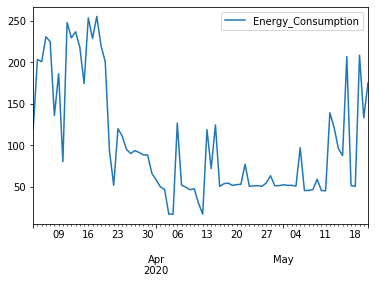

In [26]:
meter.plot()

In [27]:
### Testing For Stationarity

from statsmodels.tsa.stattools import adfuller

In [28]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(meter):
    result=adfuller(meter)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [29]:
adfuller_test(meter)

ADF Test Statistic : -1.3149336072833526
p-value : 0.6223127788685823
#Lags Used : 7
Number of Observations Used : 72
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [30]:
meter['Seasonal First Difference']=meter['Energy_Consumption']-meter['Energy_Consumption'].shift(1)

In [31]:
meter=meter.fillna(0)
meter.head()

,Energy_Consumption,Seasonal First Difference
2020-03-03,119.70,0.00
2020-03-04,203.33,83.63
2020-03-05,200.40,-2.93
2020-03-06,230.53,30.13
2020-03-07,224.76,-5.77


In [32]:
adfuller_test(meter['Seasonal First Difference'])

ADF Test Statistic : -3.3683439386610003
p-value : 0.012086540797229178
#Lags Used : 6
Number of Observations Used : 73
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


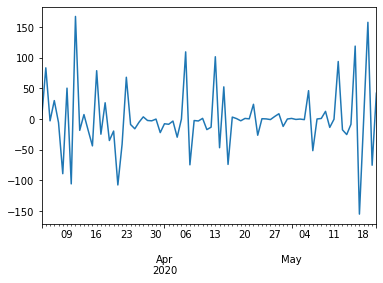

In [33]:
meter['Seasonal First Difference'].plot()

## Model Building 

In [34]:
#from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.stattools import acf, pacf

In [35]:
lag_acf = acf(meter['Seasonal First Difference'], nlags=7)
lag_pacf = pacf(meter['Seasonal First Difference'], nlags=7, method='ols')

Text(0.5, 1.0, 'Autocorrelation Function')

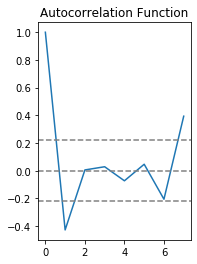

In [36]:
#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(meter['Seasonal First Difference'])),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(meter['Seasonal First Difference'])),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

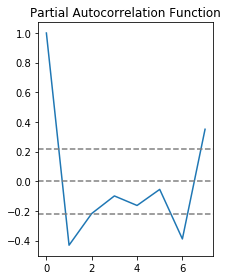

In [37]:
#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(meter['Seasonal First Difference'])),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(meter['Seasonal First Difference'])),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In [38]:
#Hence we got p=0.5, d=1, q=0.5

In [39]:
meter.head()

,Energy_Consumption,Seasonal First Difference
2020-03-03,119.70,0.00
2020-03-04,203.33,83.63
2020-03-05,200.40,-2.93
2020-03-06,230.53,30.13
2020-03-07,224.76,-5.77


In [40]:
from statsmodels.tsa.arima_model import ARIMA

## AR model

Text(0.5, 1.0, 'RSS: 175757.7520')

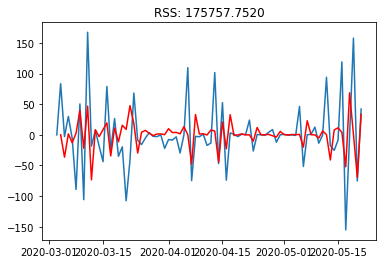

In [41]:
model1 = ARIMA(meter['Energy_Consumption'], order=(1, 1, 0))  
results_AR = model1.fit(disp=-1)  
plt.plot(meter['Seasonal First Difference'])
plt.plot(results_AR.fittedvalues, color='red')
meter1=meter.drop(meter.index[0])
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-meter1['Seasonal First Difference'])**2))

## MA model

Text(0.5, 1.0, 'RSS: 161229.9256')

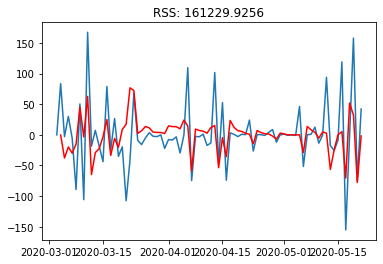

In [42]:
model2 = ARIMA(meter['Energy_Consumption'], order=(0, 1, 1))  
results_MA = model2.fit()  
plt.plot(meter['Seasonal First Difference'])
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-meter1['Seasonal First Difference'])**2))

## Combined AR+MA = ARIMA Model

Text(0.5, 1.0, 'RSS: 167057.0286')

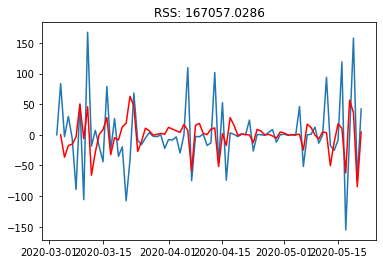

In [43]:
model3 = ARIMA(meter['Energy_Consumption'], order=(2, 1, 0))  
results_ARIMA = model3.fit()  
plt.plot(meter['Seasonal First Difference'])
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-meter1['Seasonal First Difference'])**2))

In [44]:
results_ARIMA.fittedvalues

2020-03-04     0.139175
2020-03-05   -36.523869
2020-03-06   -17.373037
2020-03-07   -15.349681
2020-03-08    -3.556032
                ...    
2020-05-17   -62.084880
2020-05-18    56.717419
2020-05-19    36.416084
2020-05-20   -84.813765
2020-05-21     4.693316
Freq: D, Length: 79, dtype: float64

In [45]:
(results_ARIMA.fittedvalues-meter1['Seasonal First Difference']).mean()

-0.6978163624894966

In [46]:
results_ARIMA.fittedvalues.mean()

0.003449460295321132

In [47]:
meter1['Seasonal First Difference'].mean()

0.7012658227848171

## Taking back to Original Scale

In [48]:
#Putting the predicted values as a series
predictions_ARIMA_diff = pd.DataFrame(results_ARIMA.fittedvalues, copy=True)
predictions_ARIMA_diff.head()

,0
2020-03-04,0.139175
2020-03-05,-36.523869
2020-03-06,-17.373037
2020-03-07,-15.349681
2020-03-08,-3.556032


In [49]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_diff_cumsum.head()

,0
2020-03-04,0.139175
2020-03-05,-36.384694
2020-03-06,-53.757731
2020-03-07,-69.107412
2020-03-08,-72.663444


In [50]:
predictions_ARIMA_diff_cumsum['original scale']=119+(predictions_ARIMA_diff_cumsum[0])*-1

In [51]:
predictions_ARIMA_diff_cumsum.head()

,0,original scale
2020-03-04,0.139175,118.860825
2020-03-05,-36.384694,155.384694
2020-03-06,-53.757731,172.757731
2020-03-07,-69.107412,188.107412
2020-03-08,-72.663444,191.663444


In [52]:
predictions_ARIMA_diff_cumsum.tail()

,0,original scale
2020-05-17,-12.740546,131.740546
2020-05-18,43.976873,75.023127
2020-05-19,80.392957,38.607043
2020-05-20,-4.420808,123.420808
2020-05-21,0.272507,118.727493


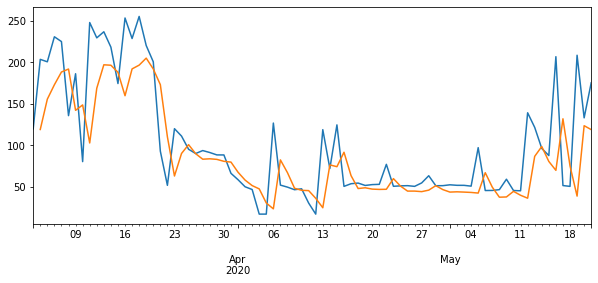

In [53]:
meter['Energy_Consumption'].plot()
predictions_ARIMA_diff_cumsum['original scale'].plot(figsize=(10, 4))

In [54]:
meter.index

DatetimeIndex(['2020-03-03', '2020-03-04', '2020-03-05', '2020-03-06',
               '2020-03-07', '2020-03-08', '2020-03-09', '2020-03-10',
               '2020-03-11', '2020-03-12', '2020-03-13', '2020-03-14',
               '2020-03-15', '2020-03-16', '2020-03-17', '2020-03-18',
               '2020-03-19', '2020-03-20', '2020-03-21', '2020-03-22',
               '2020-03-23', '2020-03-24', '2020-03-25', '2020-03-26',
               '2020-03-27', '2020-03-28', '2020-03-29', '2020-03-30',
               '2020-03-31', '2020-04-01', '2020-04-02', '2020-04-03',
               '2020-04-04', '2020-04-05', '2020-04-06', '2020-04-07',
               '2020-04-08', '2020-04-09', '2020-04-10', '2020-04-11',
               '2020-04-12', '2020-04-13', '2020-04-14', '2020-04-15',
               '2020-04-16', '2020-04-17', '2020-04-18', '2020-04-19',
               '2020-04-20', '2020-04-21', '2020-04-22', '2020-04-23',
               '2020-04-24', '2020-04-25', '2020-04-26', '2020-04-27',
      

In [55]:
from pandas.tseries.offsets import DateOffset
future_dates1=[meter.index[-1]+ DateOffset(days=x)for x in range(0,30)]

In [56]:
import itertools
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 7) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 7)
SARIMAX: (0, 0, 1) x (0, 1, 0, 7)
SARIMAX: (0, 1, 0) x (0, 1, 1, 7)
SARIMAX: (0, 1, 0) x (1, 0, 0, 7)


In [57]:
import statsmodels.api as sm
warnings.filterwarnings("ignore") # specify to ignore warning messages

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(meter['Energy_Consumption'],
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}7 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 7)7 - AIC:986.4067195805228
ARIMA(0, 0, 0)x(0, 0, 1, 7)7 - AIC:844.3041271474519
ARIMA(0, 0, 0)x(0, 1, 0, 7)7 - AIC:788.1061803908933
ARIMA(0, 0, 0)x(0, 1, 1, 7)7 - AIC:711.0550031594637
ARIMA(0, 0, 0)x(1, 0, 0, 7)7 - AIC:791.50805351122
ARIMA(0, 0, 0)x(1, 0, 1, 7)7 - AIC:782.6669293295307
ARIMA(0, 0, 0)x(1, 1, 0, 7)7 - AIC:727.65966239026
ARIMA(0, 0, 0)x(1, 1, 1, 7)7 - AIC:714.3001012319703
ARIMA(0, 0, 1)x(0, 0, 0, 7)7 - AIC:917.2770660094411
ARIMA(0, 0, 1)x(0, 0, 1, 7)7 - AIC:789.8379040123147
ARIMA(0, 0, 1)x(0, 1, 0, 7)7 - AIC:753.0713669267179
ARIMA(0, 0, 1)x(0, 1, 1, 7)7 - AIC:677.6524240016865
ARIMA(0, 0, 1)x(1, 0, 0, 7)7 - AIC:767.4084555310866
ARIMA(0, 0, 1)x(1, 0, 1, 7)7 - AIC:747.3903758009634
ARIMA(0, 0, 1)x(1, 1, 0, 7)7 - AIC:704.9133484606499
ARIMA(0, 0, 1)x(1, 1, 1, 7)7 - AIC:679.5278486951574
ARIMA(0, 1, 0)x(0, 0, 0, 7)7 - AIC:838.8626554951817
ARIMA(0, 1, 0)x(0, 0, 1, 7)7 - AIC:738.9433333486912
ARIMA(0, 1, 0)x(0, 1, 0, 7)7 - AIC:748.95899206055

In [58]:
model4 = sm.tsa.statespace.SARIMAX(meter['Energy_Consumption'],
                                order=(0, 1, 1),
                                seasonal_order=(1, 1, 1, 7))

results22 = model4.fit()

print(results22.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.4527      0.085     -5.309      0.000      -0.620      -0.286
ar.S.L7        0.1369      0.434      0.315      0.752      -0.714       0.988
ma.S.L7       -0.4971      0.416     -1.195      0.232      -1.312       0.318
sigma2      1808.8844    273.783      6.607      0.000    1272.279    2345.490


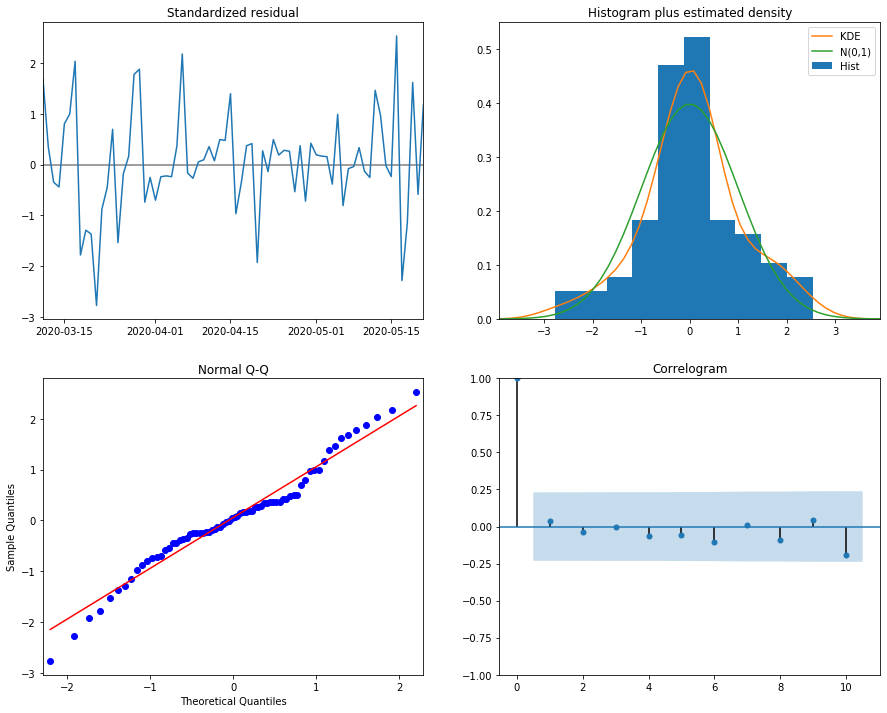

In [59]:
results22.plot_diagnostics(figsize=(15, 12))
plt.show()

#### Those observations lead us to conclude that our model produces a satisfactory fit 
##### that could help us understand our time series data and forecast future values.

In [60]:
meter

,Energy_Consumption,Seasonal First Difference
2020-03-03,119.70,0.00
2020-03-04,203.33,83.63
2020-03-05,200.40,-2.93
2020-03-06,230.53,30.13
2020-03-07,224.76,-5.77
...,...,...
2020-05-17,51.32,-155.23
2020-05-18,50.34,-0.98
2020-05-19,208.29,157.95
2020-05-20,132.89,-75.40


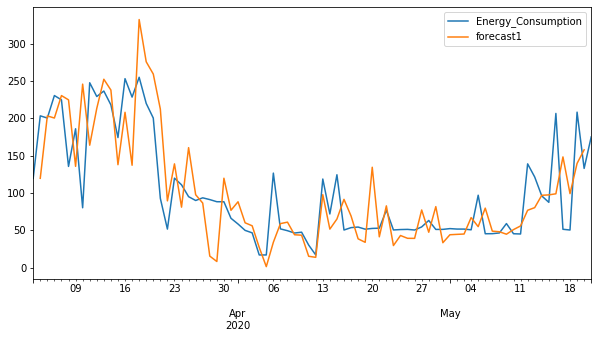

In [61]:
meter['forecast1']=results22.predict(start=1,end=78,dynamic=False)
meter[['Energy_Consumption','forecast1']].plot(figsize=(10,5))

In [62]:
future_dates1

[Timestamp('2020-05-21 00:00:00'),
 Timestamp('2020-05-22 00:00:00'),
 Timestamp('2020-05-23 00:00:00'),
 Timestamp('2020-05-24 00:00:00'),
 Timestamp('2020-05-25 00:00:00'),
 Timestamp('2020-05-26 00:00:00'),
 Timestamp('2020-05-27 00:00:00'),
 Timestamp('2020-05-28 00:00:00'),
 Timestamp('2020-05-29 00:00:00'),
 Timestamp('2020-05-30 00:00:00'),
 Timestamp('2020-05-31 00:00:00'),
 Timestamp('2020-06-01 00:00:00'),
 Timestamp('2020-06-02 00:00:00'),
 Timestamp('2020-06-03 00:00:00'),
 Timestamp('2020-06-04 00:00:00'),
 Timestamp('2020-06-05 00:00:00'),
 Timestamp('2020-06-06 00:00:00'),
 Timestamp('2020-06-07 00:00:00'),
 Timestamp('2020-06-08 00:00:00'),
 Timestamp('2020-06-09 00:00:00'),
 Timestamp('2020-06-10 00:00:00'),
 Timestamp('2020-06-11 00:00:00'),
 Timestamp('2020-06-12 00:00:00'),
 Timestamp('2020-06-13 00:00:00'),
 Timestamp('2020-06-14 00:00:00'),
 Timestamp('2020-06-15 00:00:00'),
 Timestamp('2020-06-16 00:00:00'),
 Timestamp('2020-06-17 00:00:00'),
 Timestamp('2020-06-

In [63]:
future_dates_df1=pd.DataFrame(index=future_dates1[1:],columns=meter.columns)
future_dates_df1.head()

,Energy_Consumption,Seasonal First Difference,forecast1
2020-05-22,NaN,NaN,NaN
2020-05-23,NaN,NaN,NaN
2020-05-24,NaN,NaN,NaN
2020-05-25,NaN,NaN,NaN
2020-05-26,NaN,NaN,NaN


In [64]:
meter.head(10)

,Energy_Consumption,Seasonal First Difference,forecast1
2020-03-03,119.70,0.00,NaN
2020-03-04,203.33,83.63,119.644573
2020-03-05,200.40,-2.93,203.252595
2020-03-06,230.53,30.13,200.402639
2020-03-07,224.76,-5.77,230.502134
2020-03-08,135.55,-89.21,224.765311
2020-03-09,186.01,50.46,135.649278
2020-03-10,80.15,-105.86,245.834344
2020-03-11,247.69,167.54,163.993411
2020-03-12,229.24,-18.45,213.336948


In [65]:
future1=pd.concat([meter,future_dates_df1])
future1[:78]

,Energy_Consumption,Seasonal First Difference,forecast1
2020-03-03,119.70,0.00,NaN
2020-03-04,203.33,83.63,119.644573
2020-03-05,200.40,-2.93,203.252595
2020-03-06,230.53,30.13,200.402639
2020-03-07,224.76,-5.77,230.502134
...,...,...,...
2020-05-15,87.45,-8.61,97.414473
2020-05-16,206.55,119.10,98.881167
2020-05-17,51.32,-155.23,148.298681
2020-05-18,50.34,-0.98,99.102345


In [66]:
future1[78:]

,Energy_Consumption,Seasonal First Difference,forecast1
2020-05-20,132.89,-75.40,157.825136
2020-05-21,175.10,42.21,NaN
2020-05-22,NaN,NaN,NaN
2020-05-23,NaN,NaN,NaN
2020-05-24,NaN,NaN,NaN
2020-05-25,NaN,NaN,NaN
2020-05-26,NaN,NaN,NaN
2020-05-27,NaN,NaN,NaN
2020-05-28,NaN,NaN,NaN
2020-05-29,NaN,NaN,NaN


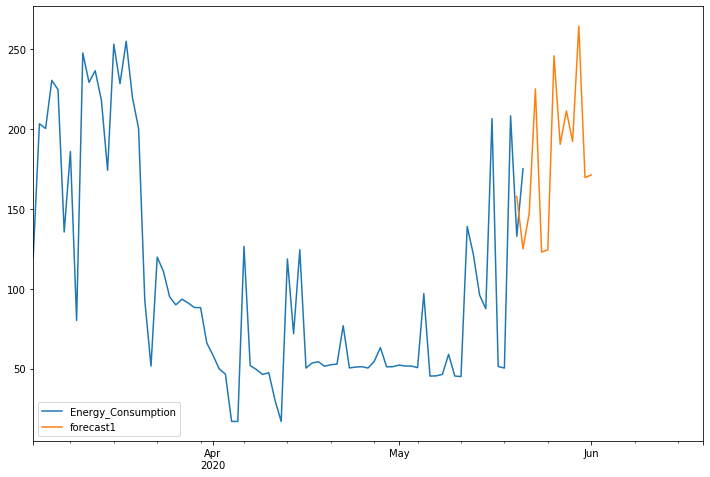

In [67]:
future1['forecast1'] = results22.predict(start = 78, end = 90, dynamic= False)  
future1[['Energy_Consumption','forecast1']].plot(figsize=(12, 8))